In [1]:
#Get the data
from pandas_datareader import data as data_reader
import matplotlib.pyplot as plt
import pandas as pd

#Get the close data for given ticker for a given range
def get_close_data( tickers : list, start_date = '2015-01-01', end_date = '2018-12-31' ):
    complete_data = data_reader.DataReader(tickers, 'yahoo', start_date, end_date);
    #get the close data
    close_data = complete_data['Close'];
    #get all the weekdays - we might not have data for some of the days so we will need to refill it
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    close_data = close_data.reindex(all_weekdays) #re-index
    close_data = close_data.fillna(method='ffill') #fill NaNs with last seen
    return close_data;

In [2]:
start_date = '2015-01-01'
end_date = '2018-12-31'
tickers = [ 'GOOGL', 'AAPL', 'MSFT' ];
all_data = get_close_data( tickers, start_date, end_date );

In [3]:
#let's see how the data looks like
all_data.describe()

Symbols,GOOGL,AAPL,MSFT
count,1042.000000,1042.000000,1042.000000
mean,860.727812,140.928225,68.717390
std,200.743272,35.005374,21.566365
min,497.059998,90.339996,40.290001
25%,724.395004,112.055000,51.315000
50%,820.160004,129.360001,62.690001
75%,1041.529999,168.795006,85.919998
max,1285.500000,232.070007,115.610001


### Interesting to see big difference between minimum and maximum values of stock prices over the period of 4 years we chose!

/Users/gursharan/.virtualenvs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


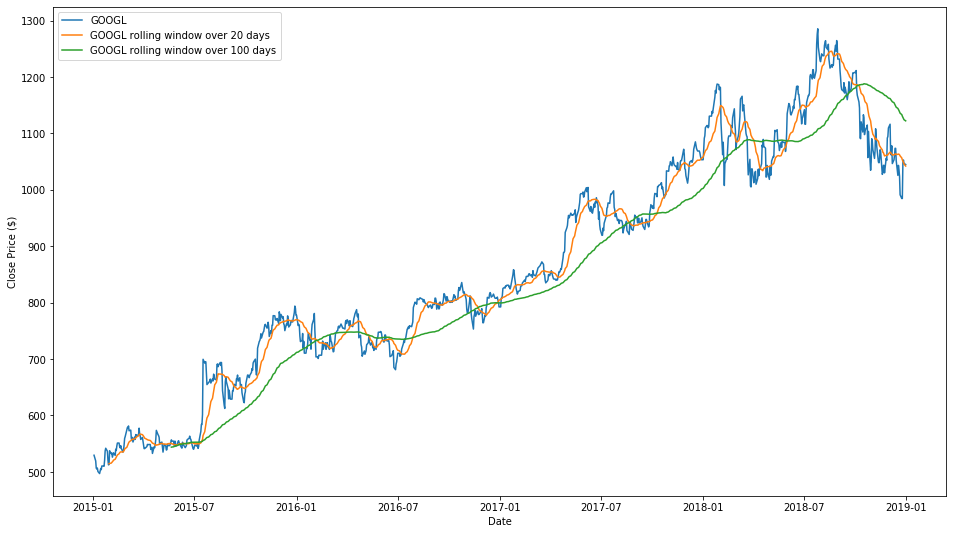

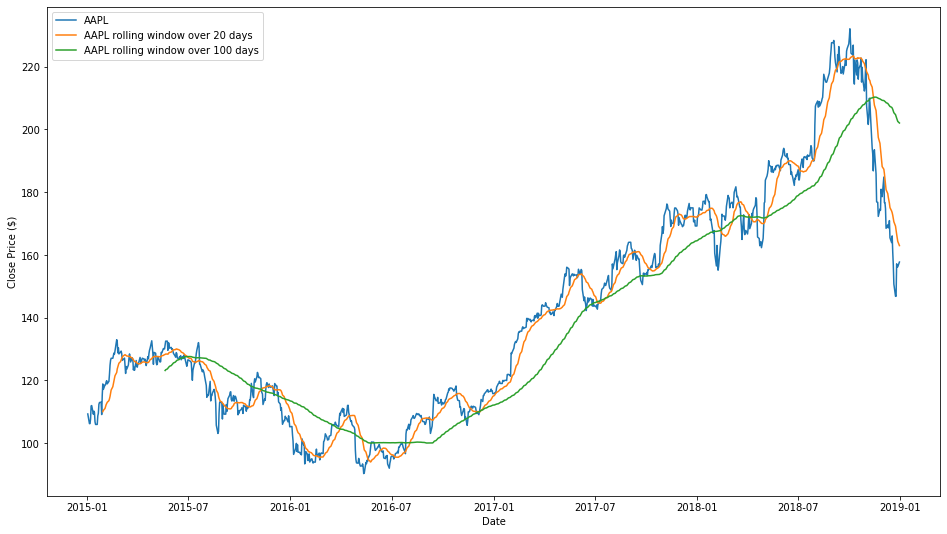

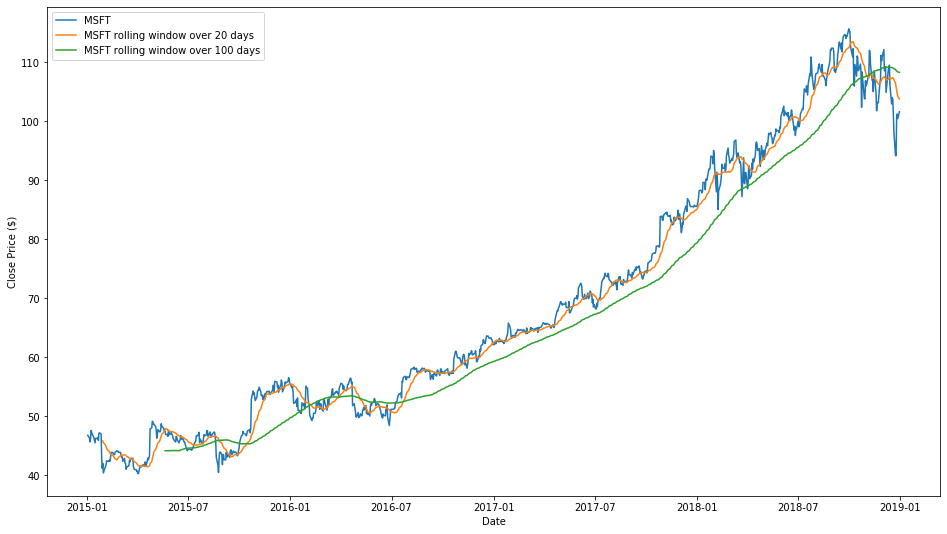

In [4]:
for ticker in tickers:
    time_series = all_data.loc[:, ticker]
    
    rolling_window_20 = time_series.rolling(window=20).mean()
    rolling_window_100 = time_series.rolling(window=100).mean()
    
    _, ax = plt.subplots(figsize=(16,9))

    ax.plot(time_series.index, time_series, label=ticker)
    ax.plot(rolling_window_20.index, rolling_window_20, label= ticker + ' rolling window over 20 days')
    ax.plot(rolling_window_100.index, rolling_window_100, label= ticker +' rolling window over 100 days')

    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price ($)')
    ax.legend()